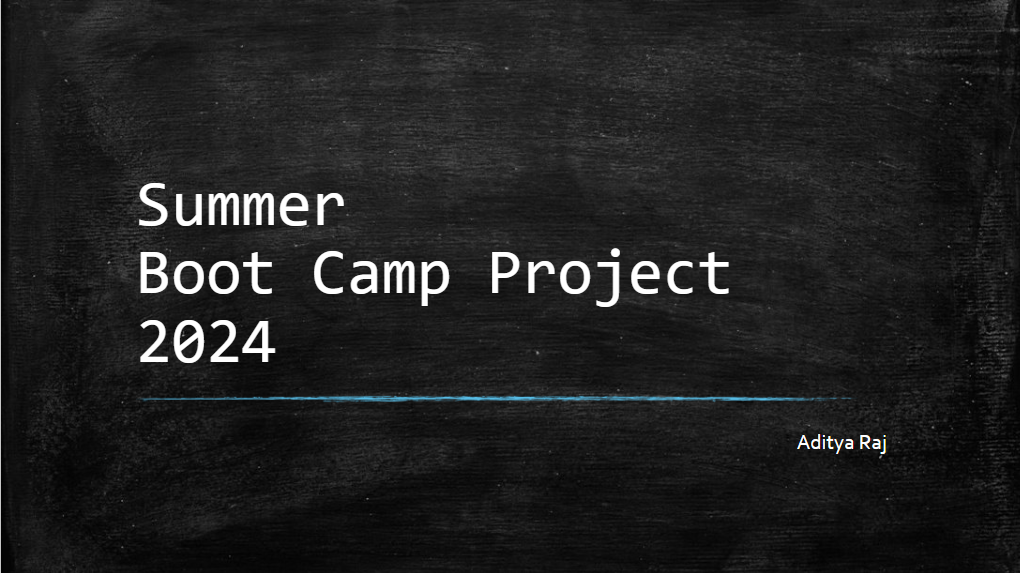

# List of Tables

# List of Figures

# Problem Statement/Objectives:

**Data** 

**Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.**

**Data Description:**

**Age:** The age of the individual in years. 

**Gender:** The gender of the individual, categorized as male or female. 

**Profession:** The occupation or profession of the individual. 

**Marital_status:** The marital status of the individual, such as married &, single 

**Education:** The educational qualification of the individual Graduate and Post Graduate 

**No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially. 

**Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No" 

**House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No" 

**Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No" 

**Salary:** The individual's salary or income. 

**Partner_salary:** The salary or income of the individual's partner, if applicable. 

**Total_salary:** The total combined salary of the individual and their partner (if applicable). 

**Price:** The price of a product or service. 

**Make:** The type of automobile 

# Importing the necessary Libraries

In [1]:
import pandas as pd #importing pandas library to read datasets.
import numpy as np #importing numpy to deal with numerical datatype.
import matplotlib.pyplot as plt #importing this will help us visualize our datasets.
import seaborn as sns #importing sns to visualize it in better way.
from sklearn.cluster import DBSCAN #DBSCAN method to detect the outliers in more scalable way. 
from sklearn.preprocessing import StandardScaler #this will help in scaling the datasets.
from sklearn.preprocessing import LabelEncoder #This will encode each category with a uinque integer.
from scipy.stats import chi2_contingency #This will help in creation of contigency tables.
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Bright_automative_company_

## Loading  the provided datasets.

In [2]:
# Reading datasets using pandas library
df=pd.read_csv(r"C:\Users\Aditya raj\OneDrive\Documents\All Projects\5-bright_automotive_company_New.csv")

**1. Display the top 5 rows.**

In [3]:
df.head() #Displaying the top 5 rows.

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


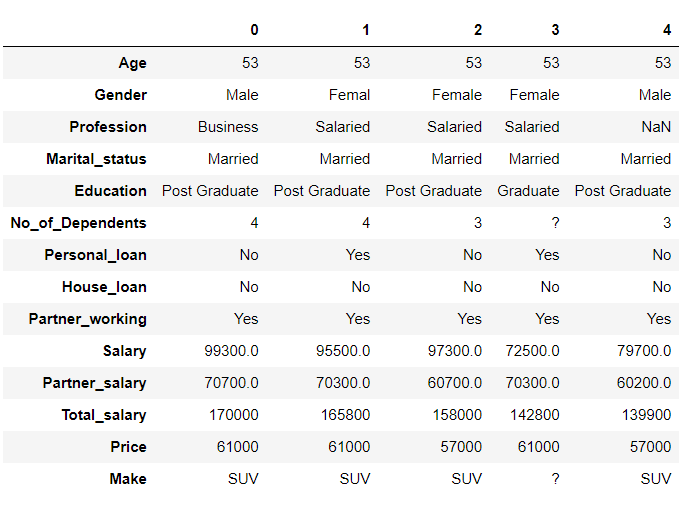

**2. Display the last 5 rows.**

In [4]:
df.tail() #Displaying the last 5 rows.

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


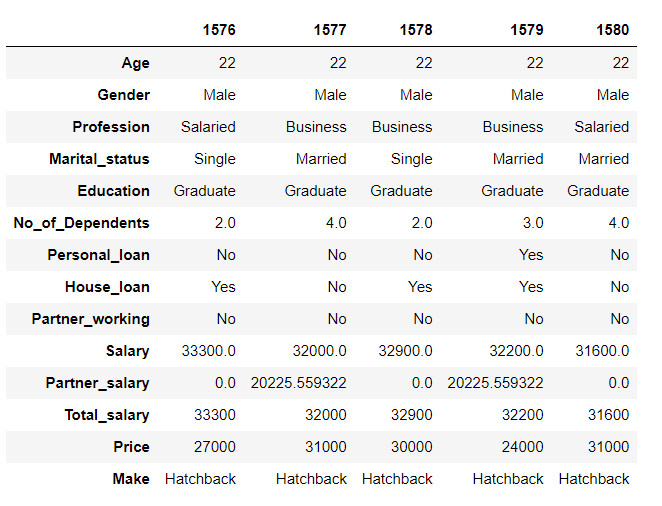

**3. Check the shape of dataset.**

In [5]:
df.shape #Checking the shape of datasets.

(1581, 14)

**4. Check the datatypes of each feature.**

In [6]:
df.info() #Checking types of datatype and information about them.
# df.dtypes #Checking the datatype of each feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


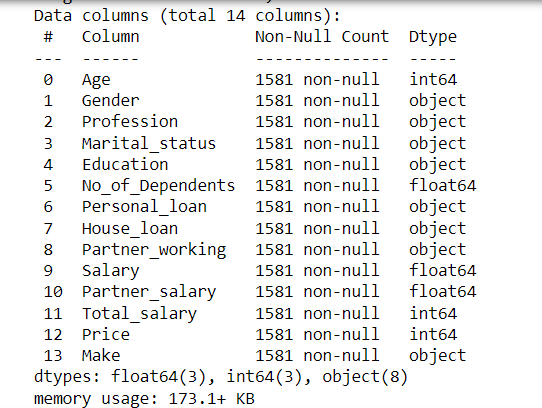

**The datasets have following types of data in given column**.
* **1. Age have integer type of data.**
* **2. Gender have object type of data.**
* **3. Proffesion have object type of data.**
* **4. Marital_Status have object type of data.**
* **5. Education have object type of data.**
* **6. No_of_Dependents have object type of data.**
* **7. Personal_loan has object type of data.**
* **8. House_loan has object type of data.**
* **9. Partner_working has object type of data.**
* **10. Salary has float64 type of data.**
* **11. Partner_salary has float64 type of data.**
* **12. Total_salary has integer type of data.**
* **13. Price has integer type of data.**
* **14. Make has object type of data.**

**5. Check the Statistical summary.**

In [7]:
df.describe() #Checking the statistical summary of given datasets only numerical columns.

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


**Results of checking the staistical summary is:**
* Age have count of 1568, avg of 31.95, Standard Deviation of 8.71, Minimum (min) of 14, 25percent of 25, Median of 29, 75percent of 38, Maximum of 120.

* Salary column has a count of 1568, an average salary of ₹60,276.91, a standard deviation of ₹14,636.20, a minimum salary of ₹30,000, a 25th percentile at ₹51,900, a median salary of ₹59,450, a 75th percentile at ₹71,700, and a maximum salary of ₹99,300.

* Partner_salary column has a count of 1475, an average partner salary of ₹20,225.56, a standard deviation of ₹19,573.15, a minimum partner salary of ₹0, a 25th percentile at ₹0, a median partner salary of ₹25,600, a 75th percentile at ₹38,300, and a maximum partner salary of ₹80,500.

* Total_salary column has a count of 1581, an average total salary of ₹79,626.00, a standard deviation of ₹25,545.86, a minimum total salary of ₹30,000, a 25th percentile at ₹60,500, a median total salary of ₹78,000, a 75th percentile at ₹95,900, and a maximum total salary of ₹171,000.

* Price column has a count of 1581, an average price of ₹35,948.17, a standard deviation of ₹21,175.21, a minimum price of ₹58, a 25th percentile at ₹25,000, a median price of ₹31,000, a 75th percentile at ₹47,000, and a maximum price of ₹680,000.


**6. Check the null values.**

In [8]:
df.isnull().sum() #Checking number of null values in each column.

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

**In the given dataset we have null values in following columns only:**
* Gender column has 53 missing values.

* Profession column has 6 missing values.

* Salary column has 13 missing values.

* Partner_salary column has 106 missing values.

**7. Check the duplicate values**

In [9]:
df.duplicated().sum() #counting  the number of True values, which corresponds to the number of duplicate rows, if there exist any.

0

**In the given dataset there are 0 duplicate values.**

**8. Check the anomalies or wrong entries.**

* **We will use IQR(Interquartile Range) for detecting outlier in our dataset.**

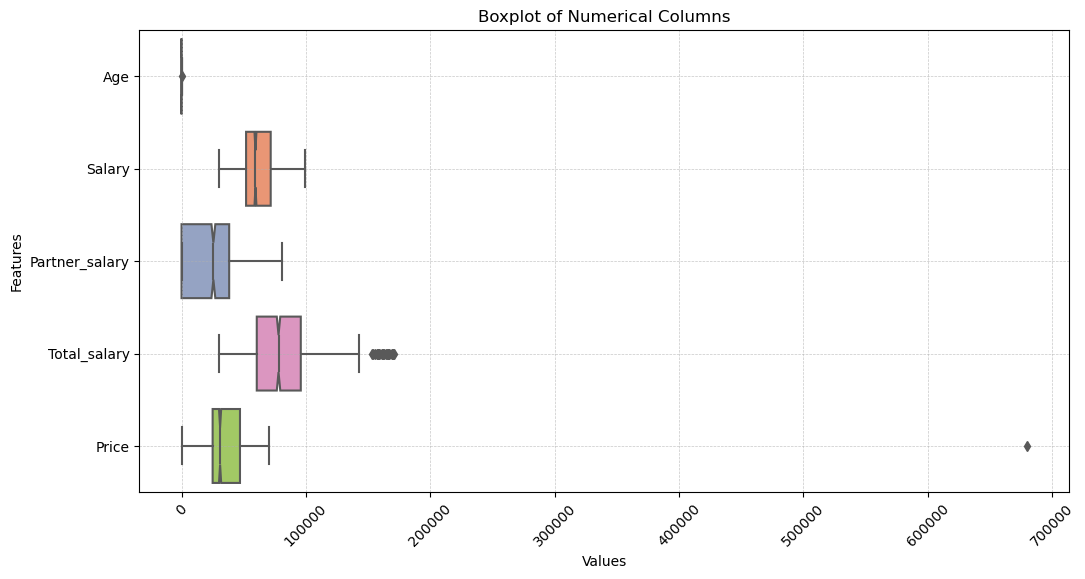

Outliers detected using IQR method:
Age                1
Salary             0
Partner_salary     0
Total_salary      27
Price              1
dtype: int64


In [10]:
# Define a function to detect outliers using IQR
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_iqr = df[numerical_columns].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numerical_columns], orient='h', notch=True, palette='Set2')

# Add title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


**The detected outliers for the following columns are:**
* Age have 1 outlier.
* Salary have 0 outlier.
* Partner_salary have 0 outlier.
* Total_salary have 27 outlier.
* Price have 1 outlier.

**9. Checking the outliers and thier authenticity**

.

**10. Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.**

**i. Dropping the duplicate values in case if there is any.** 
* There are 0 dupliccate values.

**ii. Unecessary columns**
* All the columns are required in this datasets.

**iii. Null Value imputation** 

* After analysing dataset we can see that there is a wrong entry in Gender column as 'Femal', 'Femle'.
* We need to fix this mistake by replacing it with 'Female'.

In [11]:
df['Gender']=df['Gender'].replace({'Femal': 'Female'})
df['Gender']=df['Gender'].replace({'Femle': 'Female'})

* We can se that there is ? as value in some columns so we will replace it with nan.

In [12]:
df.replace('?', np.nan, inplace=True)

* We will impute the null values of **Gender, Profession, Make** using the mode. 

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      2
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

* As we can see that the null values of above mentioned columns are replaced with mode.

* After analysing the data we can see that the No_Of_Dependents is filled with numerical value but denoted as object-type (user defined) so we will change it in numerical format.

In [15]:
df['No_of_Dependents']=pd.to_numeric(df['No_of_Dependents'], errors='coerce')

* **Now we will replace the missing values for numerical columns mentioned in dataset using mean.**

In [16]:
df['No_of_Dependents'].fillna(df['No_of_Dependents'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Partner_salary'].fillna(df['Partner_salary'].mean(), inplace=True)

final_null_values=df.isnull().sum()
print(final_null_values)

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


* Now there is no more Null values in dataset.

## **1. Descriptive Statistics:**

* **What are the mean, median and standard deviation of the ages of individuals in the dataset?**

In [17]:
#Calculating the mean,median and standard deviation of the agges of individual in the datsets.
age_mean=df['Age'].mean()
age_median=df['Age'].median()
age_std=df['Age'].std()

print(f"Mean age: {age_mean}")
print(f"Median age: {age_median}")
print(f"Standard deviation of age: {age_std}")

Mean age: 31.952561669829223
Median age: 29.0
Standard deviation of age: 8.71254886208395


* Mean age of the individual person is **31.952561**
* Median age of the individual person is **29.0**
* Standard deviation of the age for individual person is **8.71254886**

**2. Data Distribution:**

* **What is the distribution of gender in the dataset? Represent it using a pie chart.**

Gender
Male      1252
Female     329
Name: count, dtype: int64


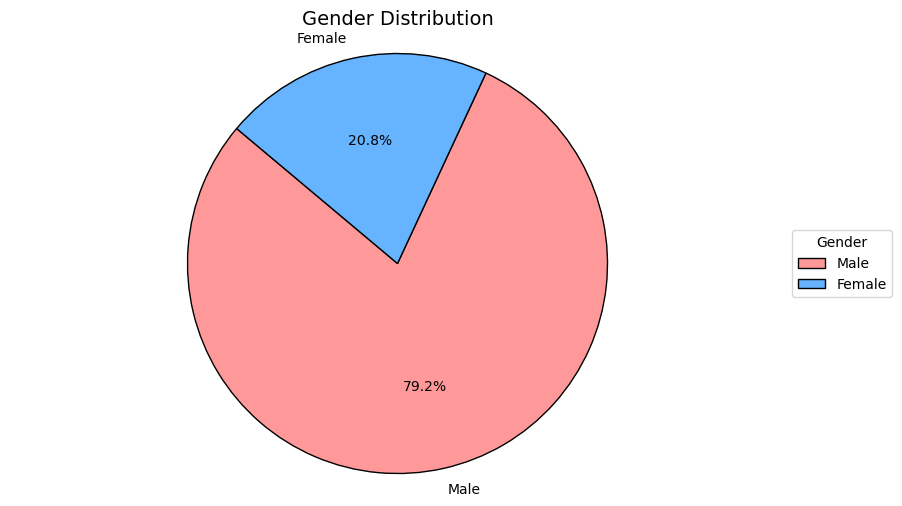

In [18]:
#Calculating the genders distriibutiion uusing the values_counts().
gender_distribution =df['Gender'].value_counts()
print(gender_distribution)

# Define labels and colors for better visualization
labels = gender_distribution.index
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  

# Plot the distribution using a pie chart with enhanced features
plt.figure(figsize=(10, 6))
plt.pie(gender_distribution, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, 
        wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend for clarity
plt.legend(labels, title='Gender', loc='center left', bbox_to_anchor=(1,0,0.5, 1))

plt.show()

* The distribution of **Gender** in dataset is:
* Distribution of **Male** is: **79.2%**
* Distribution of **Female** is: **20.8%**

**3. Correlation Analysis**

* **Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.**

In [19]:
#Calculate the correlation coefficient between 'Age' and 'Salary'
correlation_coefficient = df['Age'].corr(df['Salary'])

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation."
elif correlation_coefficient < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no correlation."

print(f"Correlation coefficient between Age and Salary: {correlation_coefficient}")
print(f"Interpretation: {interpretation}")

Correlation coefficient between Age and Salary: 0.5928552429412259
Interpretation: There is a positive correlation.


* We used correlation function of panda to find the correlation between the **Age** and **Salary** of a person.
* The correlation coefficient cames out to be **0.5928552429412259**.
* It show there is a very strong **positive** correlation between **Age** and **Salary** of the person.

**4. Salary Analysis:**

* **What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?**

Average Salary by Educational Qualifications:
Education
Graduate         48520.147069
Post Graduate    67390.651999
Name: Salary, dtype: float64


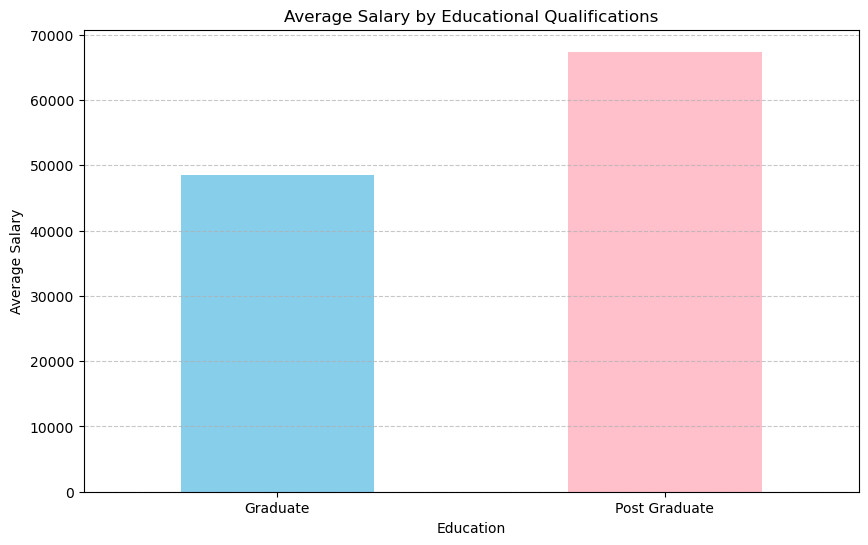

In [20]:
#Calculating the average salary based on thier educational qualifications (Graduate vs. Post Graduate)
average_salary_by_education= df.groupby('Education')['Salary'].mean()

# Dispalying the results
print("Average Salary by Educational Qualifications:")
print(average_salary_by_education)

# Create a bar plot
plt.figure(figsize=(10, 6))
average_salary_by_education.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Average Salary by Educational Qualifications')
plt.xlabel('Education')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* The average salary based on thier **Education** qualifications is:
* **Graduate** is having an **Average Salary** of **48520.147069**
* **Post Graduate** is having an **Average Salary** of **67390.651999**

**5. Loan Status**

* **What percentage of individuals have taken a personal loan? How does this compare between males and females?**

In [21]:
# Percentage of individuals with personal loans
personal_loan_counts = df['Personal_loan'].value_counts(normalize=True) * 100

# Percentage of personal loans by gender
personal_loan_gender = df.groupby('Gender')['Personal_loan'].value_counts(normalize=True).unstack() * 100

print("Percentage of individuals with personal loans:")
print(personal_loan_counts)
print("\nPercentage of personal loans by gender:")
print(personal_loan_gender)


Percentage of individuals with personal loans:
Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64

Percentage of personal loans by gender:
Personal_loan         No        Yes
Gender                             
Female         54.711246  45.288754
Male           48.642173  51.357827


**The percentage of individual with personal loans:**
* person having personal loan are **50.094877%**.
* person not having personal loan are **49.905123%**.

**Loans**
* **Males** having loans are **51.357827%**.
* **Males** having no loans are **48.642173%**.
* **Females** having loans are **45.288754%**.
* **Females** having no loans are **54.711246%**.

**6. Marital Status and Dependents**

* **What is the average number of dependents for married individuals versus single individuals?**

In [22]:
# Average number of dependents based on marital status
avg_dependents_marital_status = df.groupby('Marital_status')['No_of_Dependents'].mean()

print(avg_dependents_marital_status)

Marital_status
Married    2.538402
Single     1.608696
Name: No_of_Dependents, dtype: float64


* Average number of dependents on **Married** individuals are  **2.538402**.
* Average number of dependents on **Single** individuals are **1.608696**.

**7. Partner Employment:**

* **How does the employment status of a partner affect the total combined salary?**

Partner_working
No     60527.208976
Yes    95314.285714
Name: Total_salary, dtype: float64


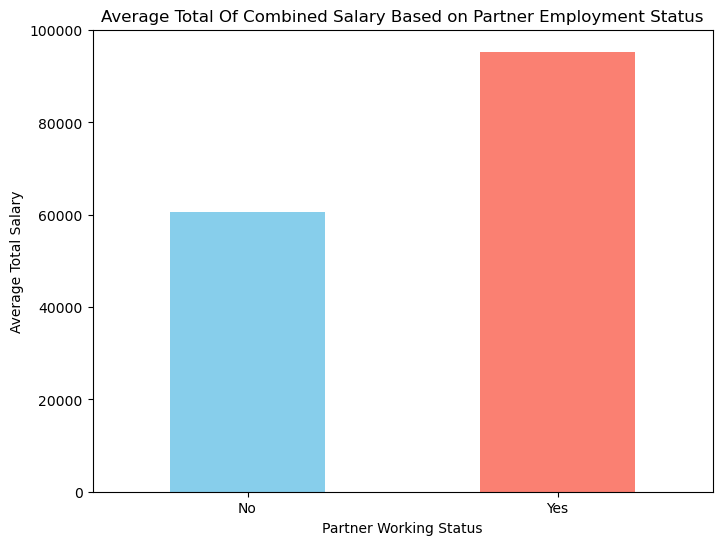

In [23]:
#Calculating the avergae of total combined salary based on partner's employment status.
total_salary_avg_partner_working=df.groupby('Partner_working')['Total_salary'].mean()

print(total_salary_avg_partner_working)

#Plotting the results
plt.figure(figsize=(8,6))
total_salary_avg_partner_working.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Average Total Of Combined Salary Based on Partner Employment Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Total Salary')
plt.xticks(rotation=0)
plt.show()

* Based on the baove analysis we can say that the employment of partner directly depends on the total combined salary as:
* Partner working have **average total salary** of **95314.285714**.
* Partner who does not work have **average total salary** of **60527.208976**.

**8. Salary Comparison:**

* **Compare the average salary of individuals whose partners are working versus those whose partners are not working.** 

Partner_working
No     60271.528573
Yes    60281.336406
Name: Salary, dtype: float64


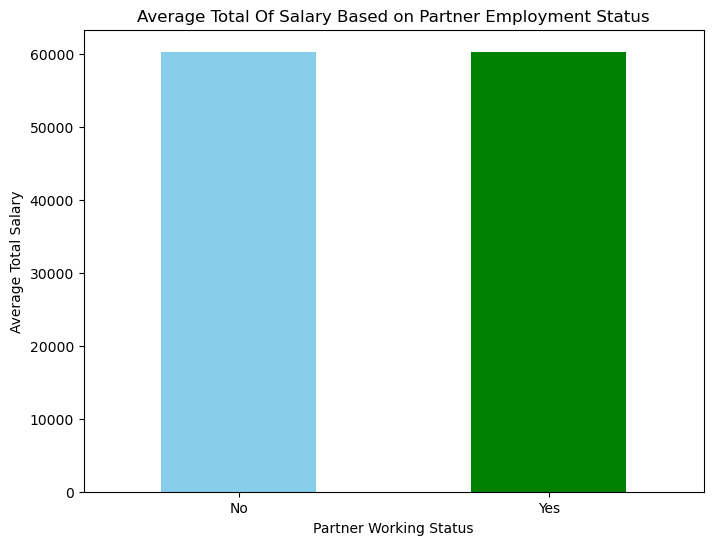

In [24]:
#Calculating the average saleries based on Partner's Employment Status
avg_of_salary_Working_partner=df.groupby('Partner_working')['Salary'].mean()

print(avg_of_salary_Working_partner)

#plotting the obtained results.
plt.figure(figsize=(8,6))
avg_of_salary_Working_partner.plot(kind='bar', color=['skyblue','green'])
plt.title('Average Total Of Salary Based on Partner Employment Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Total Salary')
plt.xticks(rotation=0)
plt.show()

* **Based on above analysis we can say the following things about the given arguements in problem statement:**
* Individual whose partners are not employed have average **Salary** of **60271.528573**.
* Individuals whose partners are employed have average **Salary** of **60281.336406**.
* So from the baove data we can say that there is very negligible difference in average salary of both individuals irresepect of thier partners are working or not. 

**9. House Loan Analysis:**

* **What is the proportion of individuals with house loans based on their profession?**

House_loan         No        Yes
Profession                      
Business    66.569343  33.430657
Salaried    66.741071  33.258929


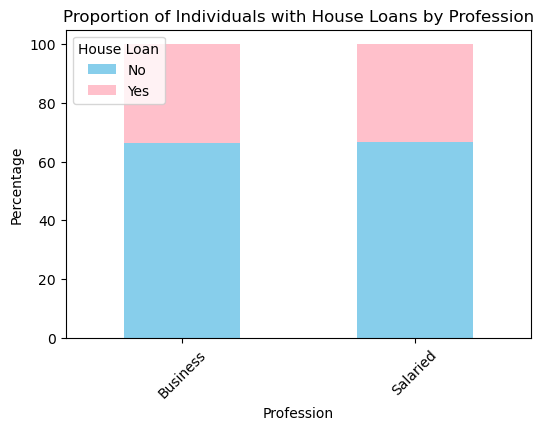

In [25]:
house_loan_count_profession=df.groupby('Profession')['House_loan'].value_counts(normalize=True).unstack() *100

#Displaying the proportions
print(house_loan_count_profession)

#Plotting the results
house_loan_count_profession.plot(kind='bar', stacked=True, figsize=(6, 4),color=['skyblue', 'pink'])
plt.title('Proportion of Individuals with House Loans by Profession')
plt.xlabel('Profession')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='House Loan', loc='upper left')
plt.show()

* **Based on above visualisation we can say that the following individuals with followiing profession are having house loans:**
* Business man taking house loans are **33.430657%** and Business man taking no House Loans are **66.569343%**.

* Salaried class individuals taking House Loans are **33.258929%** and Salaried class individuals not taking House Loans are **33.258929%**.

* **Based on above results we can say that the Business class are taking slightly more House Loans than the salaried class.**

**10. Salary Distribution:**

* **What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.**

<Figure size 1000x600 with 0 Axes>

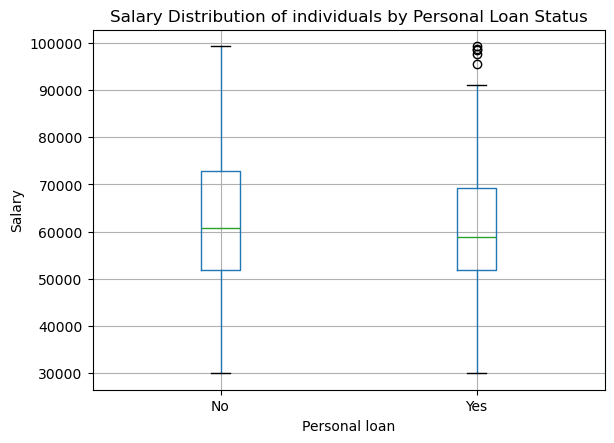

In [26]:
#Plotting the box plot for salaries of individuals based on thier personal loan status.
plt.figure(figsize=(10, 6))
df.boxplot(column='Salary', by='Personal_loan')
plt.title('Salary Distribution of individuals by Personal Loan Status')
plt.suptitle('')
plt.xlabel('Personal loan')
plt.ylabel('Salary')
plt.xticks([1,2], ['No', 'Yes'])
plt.show()

* To interpret the result from box plot we will perform t test on boxplot.

In [27]:
salaries_no_loan = df[df['Personal_loan'] == 'No']['Salary']
salaries_yes_loan = df[df['Personal_loan'] == 'Yes']['Salary']

# Perform t-test
t_stat, p_value = ttest_ind(salaries_no_loan, salaries_yes_loan, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.4115593241837443
P-value: 0.01599892337904925


* A p-value of 0.01599892337904925 is less than the common significance level of 0.05, suggesting that there is a statistically significant difference in the salaries between individuals with personal loans and those without personal loans.

* Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in the salaries of individuals with personal loans compared to those without personal loans.

* Both class have diffrent salaries.

**11. Automobile Make Analysis:**

* **How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.**

In [28]:
# Calculating the avergae salary for each automobile make by individuals.
avg_sal_by_make=df.groupby('Make')['Salary'].mean().sort_values(ascending=False)

#Displaying 20 top autmobiles makes with highest average salaries.
top_20_avg_salary_make=avg_sal_by_make.head(20)
print(top_20_avg_salary_make)

Make
SUV          71673.037444
Sedan        59794.962822
Hatchback    55083.505155
Name: Salary, dtype: float64


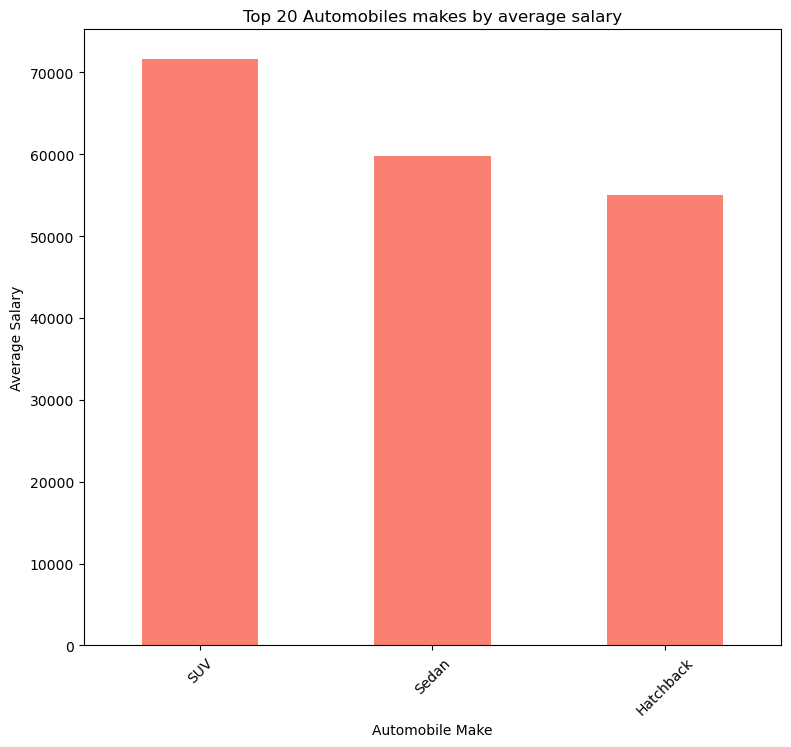

In [29]:
#Visualising the abbove result
plt.figure(figsize=(9, 8))
top_20_avg_salary_make.plot(kind='bar', color='salmon')
plt.title('Top 20 Automobiles makes by average salary')
plt.xlabel('Automobile Make')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

* **Based on the above results we can say that the:**
* Person having average salary of **71673.037444** makes **SUV**.
* Person having average salary of **59794.962822** makes **Sedan**.
* Person having average salary of **55083.505155** makes **Hatchback**.

* It further describes that the **SUV** is owned by rich individuals.
* **Sedan** is owned by moderate individuals.
* **Hatchback** is owned by lower-moderate individuals.

**12. Price Analysis:**

* **What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?**

Average price of the product/service: $35948.17

Average price by salary range:
salary_range: $(avg_price:.2f)
salary_range: $(avg_price:.2f)
salary_range: $(avg_price:.2f)
salary_range: $(avg_price:.2f)
salary_range: $(avg_price:.2f)


C:\Users\Aditya raj\AppData\Local\Temp\ipykernel_2216\3627379370.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_salary=df.groupby('salary_range')['Price'].mean()


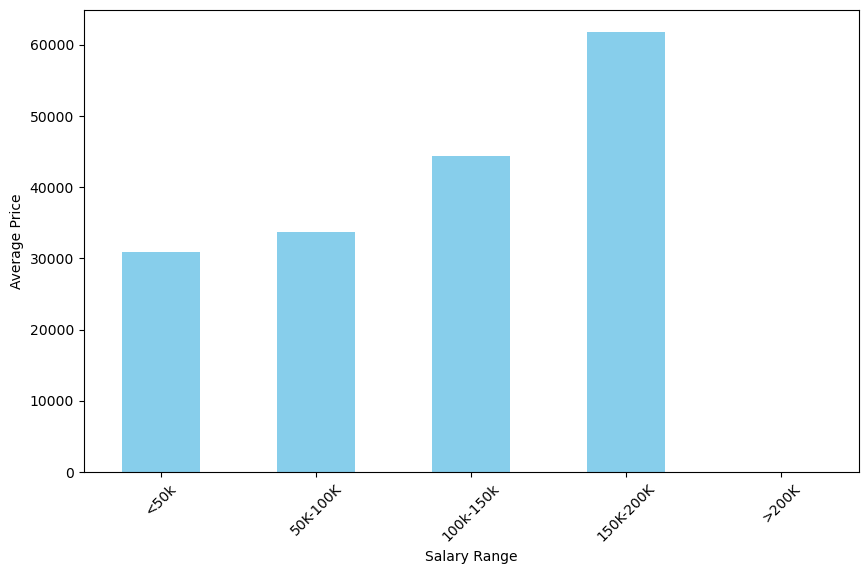

In [30]:
#Calculating the average price of the product/service
average_price=df['Price'].mean()
print(f"Average price of the product/service: ${average_price:.2f}")

#Analyzing how the price varies based on total salary
bins_salary=[0,50000,100000,150000, 200000, float('inf')]
salary_labels=['<50k', '50K-100K', '100k-150k','150K-200K', '>200K']

df['salary_range']=pd.cut(df['Total_salary'], bins=bins_salary, labels=salary_labels, right=False)

# Calculate the average price for each salary range
average_price_by_salary=df.groupby('salary_range')['Price'].mean()

#Print the average price by salary range
print("\nAverage price by salary range:")
for salary_range, avg_price in average_price_by_salary.items():
    print(f"{'salary_range'}: $(avg_price:.2f)")
    
# Plot the results
plt.figure(figsize=(10,6))
average_price_by_salary.plot(kind='bar', color='skyblue')
plt.xlabel('Salary Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

**13. Martial Status and Loans**

* **Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?**

In [31]:
#Grouping data by martial status and count personal= loans
personal_loans_by_marital_status=df.groupby('Marital_status')['Personal_loan'].value_counts().unstack().fillna(0)
print(personal_loans_by_marital_status)

#perforing Chi-square test 
chi2, p, _, _ = chi2_contingency(personal_loans_by_marital_status)

print(f"Chi-square Test statistics: {chi2}")
print(f"P-value: {p}")

if p<0.05:
    print("There is a significant diffrences in the number of personal loans taken by married individuals compared to single individuals.")
else:
    print("There is no significant difference in the number of personal loans taken by married individuals compared to single individuals.")

Personal_loan    No  Yes
Marital_status          
Married         723  720
Single           66   72
Chi-square Test statistics: 0.1782394652161357
P-value: 0.6728906021290224
There is no significant difference in the number of personal loans taken by married individuals compared to single individuals.


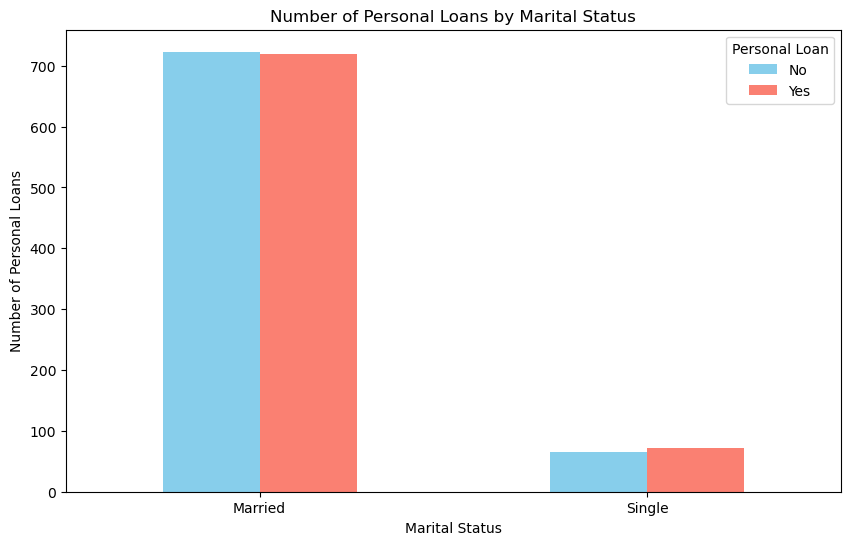

In [32]:
# Plotting the results in a bar graph
personal_loans_by_marital_status.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Number of Personal Loans by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Personal Loans')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

**14. Educational Qualification Impact:**

* **How does educational qualification impact the likelihood of taking a house loan?**

               No_House_Loan  House_Loan
Education                               
Graduate            0.661074    0.338926
Post Graduate       0.670051    0.329949


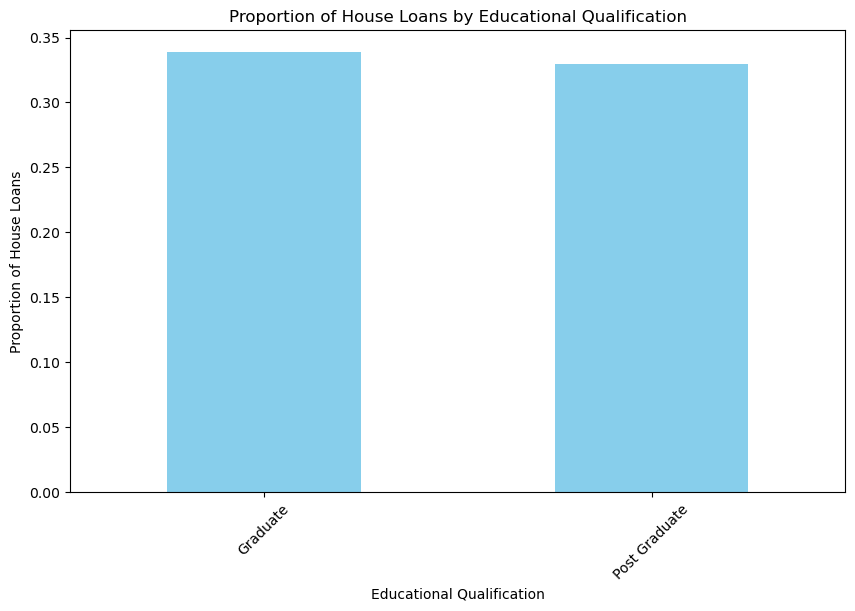

In [33]:
#Grouping data by educational qualification and count house loans
house_loans_by_education=df.groupby('Education')['House_loan'].value_counts(normalize=True).unstack().fillna(0)

#Renaming columns for better readability
house_loans_by_education.columns= ['No_House_Loan', 'House_Loan']

#print the proportion of house loans by educational qualification
print(house_loans_by_education)

# Plotting the results in a bar graph
house_loans_by_education['House_Loan'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Proportion of House Loans by Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Proportion of House Loans')
plt.xticks(rotation=45)
plt.show()

**15. Dependent Count Analysis:**

* **Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?**

The profession with the highest average number of dependents is: Business
Average number of dependents in this profession: 2.49


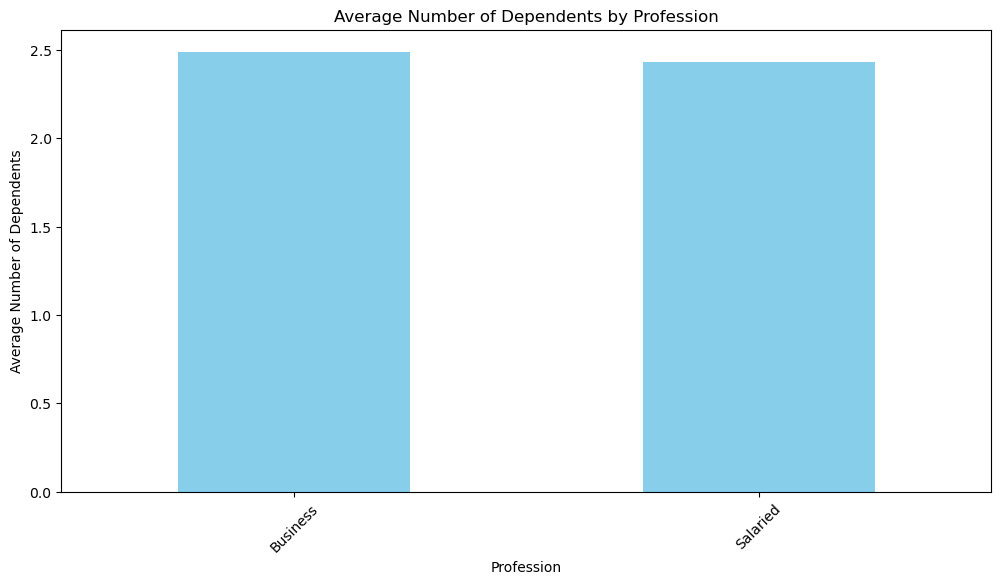

In [34]:
#Group data by profession and calculate the average number of dependents
average_dependents_by_profession = df.groupby('Profession')['No_of_Dependents'].mean()

# Identify the profession with the highest average number of dependents
profession_with_highest_dependents = average_dependents_by_profession.idxmax()
highest_average_dependents = average_dependents_by_profession.max()

print(f"The profession with the highest average number of dependents is: {profession_with_highest_dependents}")
print(f"Average number of dependents in this profession: {highest_average_dependents:.2f}")

# Plotting the results in a bar graph
average_dependents_by_profession.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Number of Dependents by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Number of Dependents')
plt.xticks(rotation=45)
plt.show()

**16. Gender and Salary:**

* **Is there a significant difference in salaies between males and females? Provide statistical evidence.**

   Gender  Total_salary
0  Female  88689.361702
1    Male  77244.329073


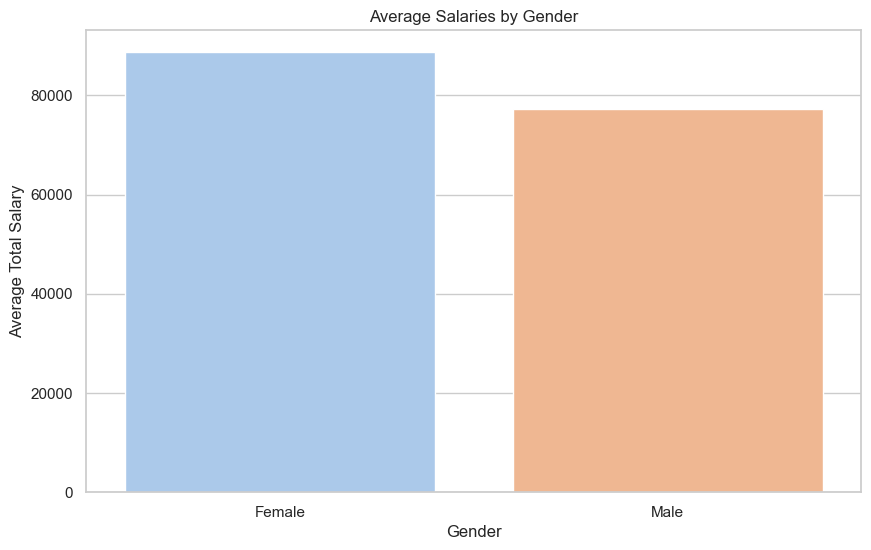

In [35]:

# Calculate the average salary for each gender
average_salaries = df.groupby('Gender')['Total_salary'].mean().reset_index()

# Print the average salaries
print(average_salaries)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot to visualize the average salaries by gender
sns.barplot(x='Gender', y='Total_salary', data=average_salaries, palette='pastel')

plt.title('Average Salaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Salary')
plt.show()

**17. Regression Analysis**

* **Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance.**

In [36]:
# Data Cleaning
df.replace('?', pd.NA, inplace=True)
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
df['No_of_Dependents'].fillna(df['No_of_Dependents'].median(), inplace=True)
df.dropna(subset=['Salary', 'Education'], inplace=True)
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

# Select features and target
features = df[['Age', 'No_of_Dependents'] + [col for col in df.columns if col.startswith('Education_')]]
target = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficients of the features
coefficients = model.coef_
feature_names = features.columns

# Create a dataframe for better visualization
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Print results
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("\nFeature Coefficients:")
print(coeff_df)

Mean Absolute Error (MAE): 5528.008469466143
R-squared (R²): 0.7784914637819996

Feature Coefficients:
                   Feature   Coefficient
0                      Age    981.331255
1         No_of_Dependents    890.018480
2  Education_Post Graduate  18600.409028


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


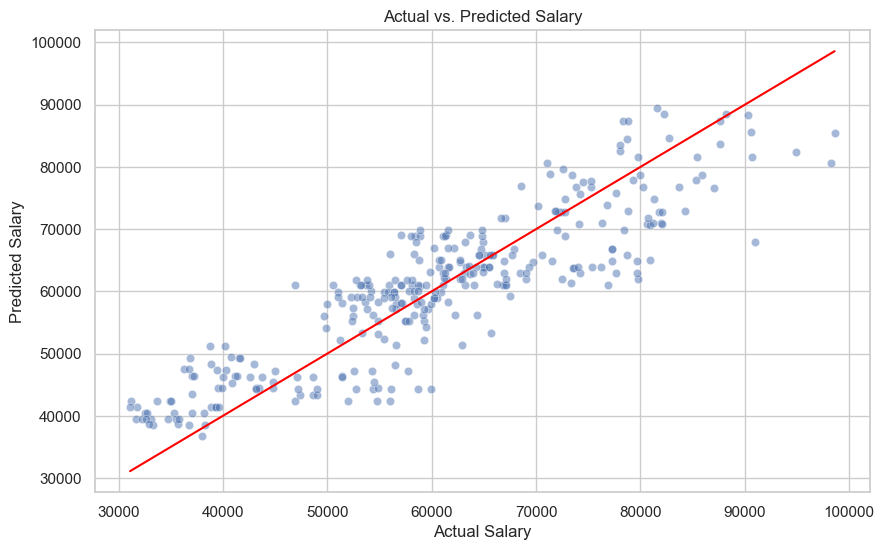

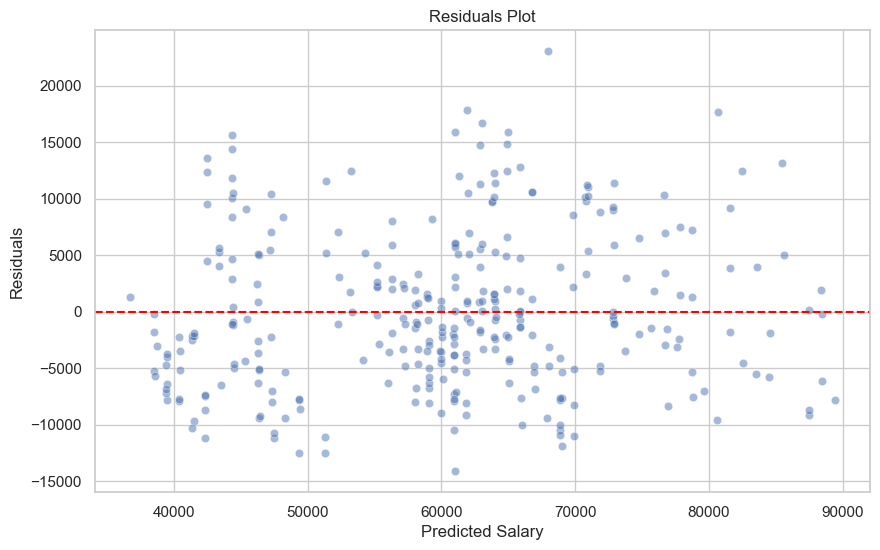

In [38]:

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='red')  # Reference line for perfect predictions
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**18. Loan Status Impact:**

* **How does having a personal loan affect the total combined salary of the individual and their partner?**

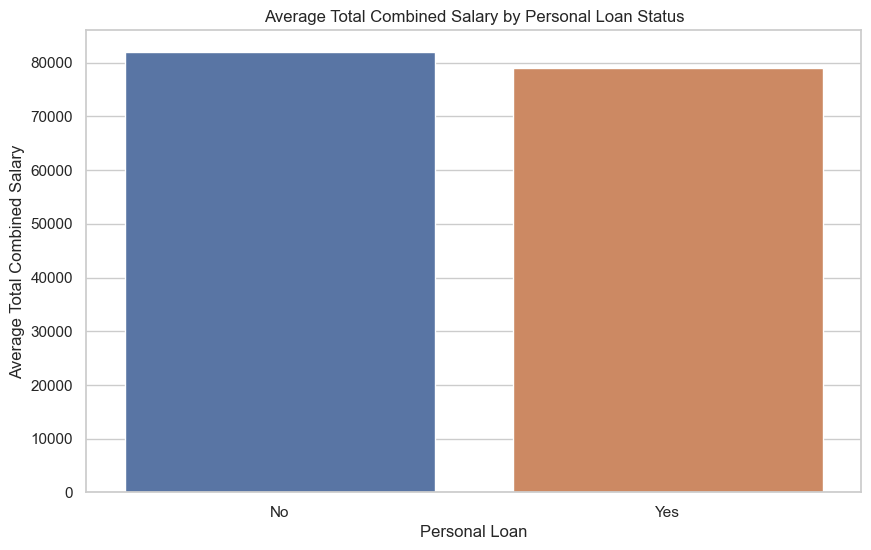

,Personal_loan,Total_combined_salary
0,No,81963.61
1,Yes,79046.87


In [41]:
#Calculating the total combined salary
df['Total_combined_salary'] = df['Salary'] + df['Partner_salary']

# Group by Personal Loan status and calculate the average combined salary
avg_combined_salary = df.groupby('Personal_loan')['Total_combined_salary'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Personal_loan', y='Total_combined_salary', data=avg_combined_salary)
plt.xlabel('Personal Loan')
plt.ylabel('Average Total Combined Salary')
plt.title('Average Total Combined Salary by Personal Loan Status')
plt.show()

# Display the results in a tabular form
styled_table = avg_combined_salary.style.set_caption("Average Total Combined Salary by Personal Loan Status").background_gradient(cmap='viridis').format(precision=2)
styled_table

**19. Partner's Salary Contribution:**

* **What is the average partner's salary for individuals with and without house loans?**

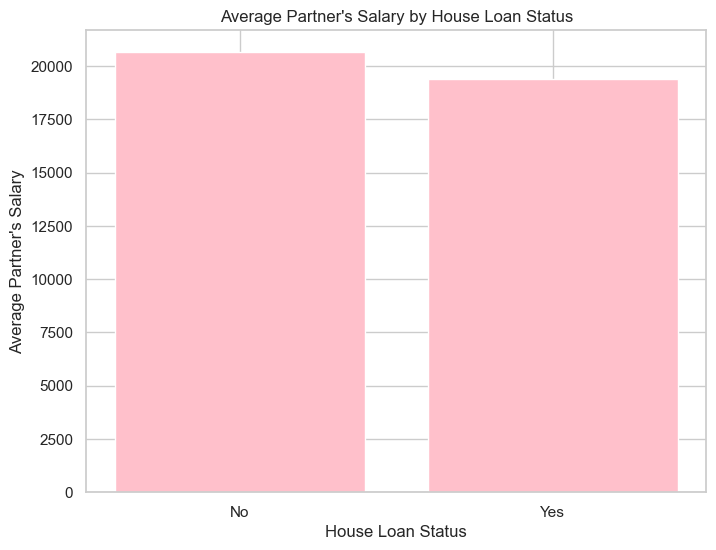

,House_loan,Partner_salary
0,No,20646.03
1,Yes,19384.62


In [44]:
# Group by House Loan status and calculate the average partner's salary
avg_partner_salary = df.groupby('House_loan')['Partner_salary'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(avg_partner_salary['House_loan'], avg_partner_salary['Partner_salary'], color='pink')
plt.xlabel('House Loan Status')
plt.ylabel("Average Partner's Salary")
plt.title("Average Partner's Salary by House Loan Status")
plt.show()

# Display the results in a tabular form
styled_table = avg_partner_salary.style.set_caption("Average Partner's Salary by House Loan Status").background_gradient(cmap='viridis').format(precision=2)
styled_table

**20. Total Salary Distribution:**

* **Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.**

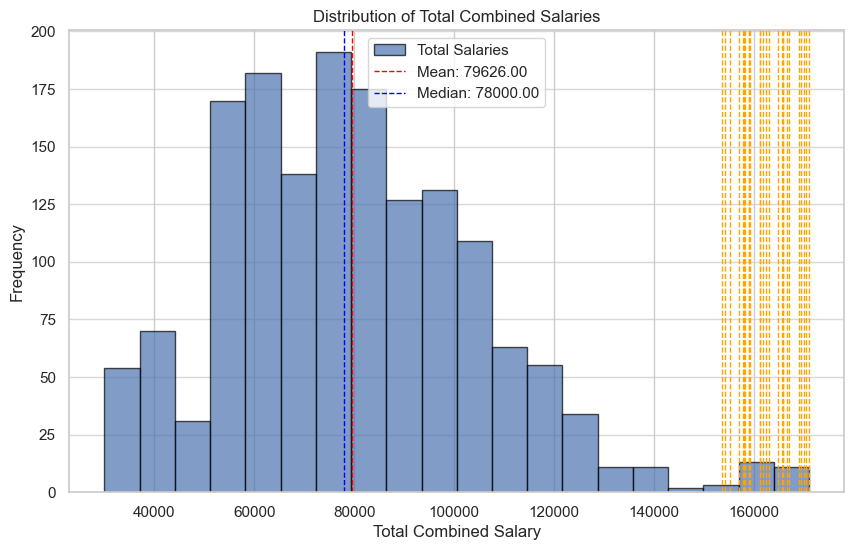

Summary Statistics:
         Statistic        Value
       Mean Salary 79625.996205
     Median Salary 78000.000000
Standard Deviation 25545.857768

Outliers:
 Outliers
   170000
   165800
   158000
   165700
   162900
   159000
   169000
   165600
   161100
   166900
   155200
   170400
   171000
   154100
   164700
   161800
   153500
   169300
   159100
   162300
   161100
   166500
   156900
   158900
   157700
   157900
   158200


In [59]:
total_salaries = df['Total_salary']

# Calculate mean, median, and standard deviation of the total combined salaries
mean_salary = total_salaries.mean()
median_salary = total_salaries.median()
std_salary = total_salaries.std()

# Identify outliers using the IQR method
Q1 = total_salaries.quantile(0.25)
Q3 = total_salaries.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR above Q3 or below Q1
outliers = total_salaries[(total_salaries < (Q1 - 1.5 * IQR)) | (total_salaries > (Q3 + 1.5 * IQR))]

# Create a table for the summary statistics and outliers
summary_table = pd.DataFrame({
    'Statistic': ['Mean Salary', 'Median Salary', 'Standard Deviation'],
    'Value': [mean_salary, median_salary, std_salary]
})

outliers_table = pd.DataFrame({
    'Outliers': outliers.values
})

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_salaries, bins=20, edgecolor='black', alpha=0.7, label='Total Salaries')

# Plot mean and median lines
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_salary:.2f}')
plt.axvline(median_salary, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_salary:.2f}')

# Highlight outliers
for outlier in outliers:
    plt.axvline(outlier, color='orange', linestyle='dashed', linewidth=1)

plt.title('Distribution of Total Combined Salaries')
plt.xlabel('Total Combined Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Display the summary statistics and outliers in tabular form
print("Summary Statistics:")
print(summary_table.to_string(index=False))
print("\nOutliers:")
print(outliers_table.to_string(index=False))